In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import os


## Einlesen der Rohdaten (CSV-Dateien)

Hier werden die aufgezeichneten Bewegungsdaten  aus den entsprechenden CSV-Dateien geladen.


Je nach Testbedingung wurden **flache Strecke** oder **Bergauf** analysiert. Die Daten werden dabei direkt als DataFrames eingelesen.


In [ ]:
# CSV-Datei laden: Anpassen mit deinem Pfad

#Daten von Dominic einlesen
csv_Dominic_flach1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-44_IMU_BewAn_Langlauf_flach_hinzurück_1.csv'
csv_Dominic_flach2 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-45_IMU_BewAn_Langlauf_flach_hinzurück_2.csv'
csv_Dominic_berg1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-42_IMU_BewAn_Langlauf_bergauf_1.csv'
csv_Dominic_berg2 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-43_IMU_BewAn_Langlauf_bergauf_2.csv'

#Daten von Lennard einlesen
csv_Lennard_flach1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Zaschke,_Lenard/2025-04-23-16-58_IMU_BewAn_Langlauf_flach­hinzurück_1.csv'
csv_Lennard_flach2 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Zaschke,_Lenard/2025-04-23-16-59_IMU_BewAn_Langlauf_flach_hinzurück_2.csv'
csv_Lennard_berg1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Zaschke,_Lenard/2025-04-23-17-02_IMU_BewAn_Langlauf_bergauf_1.csv'
csv_Lennard_berg2 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Zaschke,_Lenard/2025-04-23-17-04_IMU_BewAn_Langlauf_bergauf_2.csv'

#Daten von Paul einlesen
csv_paul_flach1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Krajewski,_Paul/2025-04-23-14-48_IMU_BewAn_Langlauf_1_hinzurück_Flach.csv'


# Dataframe erstellen von jeder CSV-Datei

df_dominic_flach1 = pd.read_csv(csv_Dominic_flach1, skiprows=3, sep=';', decimal=',')
df_dominic_flach2 = pd.read_csv(csv_Dominic_flach2, skiprows=3, sep=';', decimal=',')
df_dominic_berg1 = pd.read_csv(csv_Dominic_berg1, skiprows=3, sep=';', decimal=',')
df_dominic_berg2 = pd.read_csv(csv_Dominic_berg2, skiprows=3, sep=';', decimal=',')

df_lennard_flach1 = pd.read_csv(csv_Lennard_flach1, skiprows=3, sep=';', decimal=',')
df_lennard_flach2 = pd.read_csv(csv_Lennard_flach2, skiprows=3, sep=';', decimal=',')
df_lennard_berg1 = pd.read_csv(csv_Lennard_berg1, skiprows=3, sep=';', decimal=',')
df_lennard_berg2 = pd.read_csv(csv_Lennard_berg2, skiprows=3, sep=';', decimal=',')

df_paul_flach1 = pd.read_csv(csv_paul_flach1, skiprows=3, sep=';', decimal=',')



C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\542642292.py:23: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_flach1 = pd.read_csv(csv_Dominic_flach1, skiprows=3, sep=';', decimal=',')
C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\542642292.py:24: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_flach2 = pd.read_csv(csv_Dominic_flach2, skiprows=3, sep=';', decimal=',')
C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\542642292.py:25: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_berg1 = pd.read_csv(csv_Dominic_berg1, skiprows=3, sep=';', decimal=',')
C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\542642292.py:26: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_berg2 = pd.read_csv(csv_Dominic_b

## Daten von Dominic zuschneiden und Benennen

In [935]:
#Daten von Dominic zuschneiden und name der Aufzeichnung hinzufügen

# dominic_flach1 zuschneiden
df_dominic_flach1_0_15 = df_dominic_flach1[(df_dominic_flach1["time"] >= 0) & (df_dominic_flach1["time"] <= 15)].copy()    # Von 0 bis 15 Sekunden
df_dominic_flach1_22_end = df_dominic_flach1[df_dominic_flach1["time"] >= 22].reset_index(drop=True).copy()     # Von 22 Sekunden bis zum Ende

# dominic_flach2 zuschneiden
df_dominic_flach2_0_15 = df_dominic_flach2[(df_dominic_flach2["time"] >= 0) & (df_dominic_flach2["time"] <= 15)].copy()     # Von 0 bis 15 Sekunden
df_dominic_flach2_22_end = df_dominic_flach2[df_dominic_flach2["time"] >= 22].reset_index(drop=True).copy()     # Von 22 Sekunden bis zum Ende

# Namen der Aufzeichnung hinzufügen
df_dominic_flach1_0_15["Aufzeichnung"] = "Dominic_Flach_1"
df_dominic_flach1_22_end["Aufzeichnung"] = "Dominic_Flach_2"
df_dominic_flach2_0_15["Aufzeichnung"] = "Dominic_Flach_3"
df_dominic_flach2_22_end["Aufzeichnung"] = "Dominic_Flach_4"

df_dominic_berg1["Aufzeichnung"] = "Dominic_Berg1"
df_dominic_berg2["Aufzeichnung"] = "Dominic_Berg2"




## Daten von Lennard zuschneiden und Benennen

In [949]:
#Daten von Lennard zuschneiden um Störungen zu entfernen
# lennard_flach1 zuschneiden
df_lennard_flach1_0_17 = df_lennard_flach1[(df_lennard_flach1["time"] >= 0) & (df_lennard_flach1["time"] <= 17)].copy()    # Von 0 bis 15 Sekunden
df_lennard_flach1_30_end = df_lennard_flach1[df_lennard_flach1["time"] >= 30].reset_index(drop=True).copy() 

# lennard_flach2 zuschneiden
df_lennard_flach2_0_17 = df_lennard_flach2[(df_lennard_flach2["time"] >= 0) & (df_lennard_flach2["time"] <= 17)].copy()    # Von 0 bis 15 Sekunden
df_lennard_flach2_34_end = df_lennard_flach2[(df_lennard_flach2["time"] >= 34) & (df_lennard_flach2["time"] <= 50)].reset_index(drop=True).copy()

# Namen der Aufzeichnung hinzufügen
df_lennard_flach1_0_17["Aufzeichnung"] = "Lennard_Flach_1"
df_lennard_flach1_30_end["Aufzeichnung"] = "Lennard_Flach_2"
df_lennard_flach2_0_17["Aufzeichnung"] = "Lennard_Flach_3"
df_lennard_flach2_34_end["Aufzeichnung"] = "Lennard_Flach_4"

df_lennard_berg1["Aufzeichnung"] = "Lennard_Berg1"
df_lennard_berg2["Aufzeichnung"] = "Lennard_Berg2"

"""
Kommentar:
Lennards Berg daten leider nicht auswertbar. Hier konnten die Stockeinsätze nicht überall ordentlich erkannt werden.
Siehe im Ordner Validierung_Stockeinsätze_Zeitpunkte die Bilder dazu.
Name:   Peaks_Lennard_Berg1_RT_Hand_Accel_Sensor_Y_mG
        Peaks_Lennard_Berg2_RT_Hand_Accel_Sensor_Y_mG
"""


'\nKommentar:\nLennards Berg daten leider nicht auswertbar. Hier konnten die Stockeinsätze nicht überall ordentlich erkannt werden.\nSiehe im Ordner Validierung_Stockeinsätze_Zeitpunkte die Bilder dazu.\nName:   Peaks_Lennard_Berg1_RT_Hand_Accel_Sensor_Y_mG\n        Peaks_Lennard_Berg2_RT_Hand_Accel_Sensor_Y_mG\n'

## Daten von Paul zuschneiden und Benennen

In [937]:
#Daten von Paul zuschneiden 

# paul_flach1 zuschneiden
df_paul_flach1_0_17 = df_paul_flach1[(df_paul_flach1["time"] >= 0) & (df_paul_flach1["time"] <= 17)].copy()    # Von 0 bis 15 Sekunden
df_paul_flach1_50_end = df_paul_flach1[(df_paul_flach1["time"] >= 50)& (df_paul_flach1["time"] <= 65)].reset_index(drop=True).copy()

# Namen der Aufzeichnung hinzufügen
df_paul_flach1_0_17["Aufzeichnung"] = "Paul_Flach_1"
df_paul_flach1_50_end["Aufzeichnung"] = "Paul_Flach_2"

"""
Kommentar: 
df_paul_flach1_50_end
Das Frame liefert keine Daten die analysiert werden können. Da hier im Video klar erkennbar ist das das Skelett unmenschliche Bewegungen macht"""

'\nKommentar: \ndf_paul_flach1_50_end\nDas Frame liefert keine Daten die analysiert werden können. Da hier im Video klar erkennbar ist das das Skelett unmenschliche Bewegungen macht'



### Auswahl des zu analysierenden DataFrames

Zur besseren Übersicht wird in diesem Notebook jeweils nur **ein** DataFrame geplottet und analysiert. Auf diese Weise wurde jede einzelne Aufzeichnung überprüft, insbesondere ob die **Stockeinsätze** mithilfe der Peak-Funktion korrekt erkannt wurden – ein entscheidender Schritt für alle weiteren Berechnungen.

Um einen bestimmten der oben definierten DataFrames zu analysieren, bitte in der folgenden Code-Zeile den gewünschten DataFrame hinter `test_df = ...` eintragen. Anschließend das Notebook über **"Run all"** komplett ausführen.



In [938]:
testdf = df_dominic_flach1_0_15

Hier wurde Die Beschleunigung der Rechten Hand über die Zeit ausgeplottet um einen ersten Überblick zu bekommen ob es valide Werte liefert

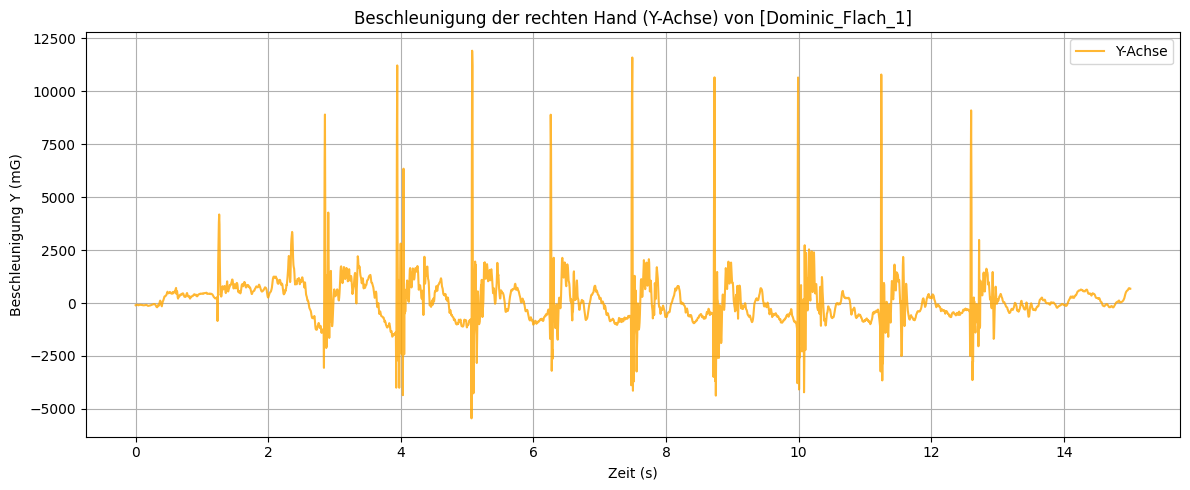

In [939]:
def plot_acceleration_y_axis(df, title_suffix=""):
    # Versuche, den Aktivitätsnamen aus der Spalte zu holen, falls vorhanden
    if "Aufzeichnung" in df.columns:
        activity = df["Aufzeichnung"].iloc[0]
        title = f"Beschleunigung der rechten Hand (Y-Achse) von [{activity}]{title_suffix}"
    else:
        title = f"Beschleunigung der rechten Hand (Y-Achse) von {title_suffix}"

    plt.figure(figsize=(12, 5))
    plt.plot(df["time"], df["RT Hand Accel Sensor Y (mG)"], label="Y-Achse", color="orange", alpha=0.8)
    plt.title(title)
    plt.xlabel("Zeit (s)")
    plt.ylabel("Beschleunigung Y (mG)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_acceleration_y_axis(testdf)


## Visualisierung der erkannten Stockeinsätze

Mit der Funktion `plot_peaks_on_axis()` wird die Beschleunigung entlang einer bestimmten Achse geplottet, und es werden automatisch Peaks erkannt – diese stellen die Zeitpunkte **Stockeinsätze** dar.

Das ist wichtig, weil wir den **Doppelstockzyklus** in unserem Experiment so definiert haben, dass er immer **von einem Stockeinsatz bis zum nächsten** geht.
Nur wenn die Peaks zuverlässig erkannt werden, können die weiteren Analysen wie z. B. **Range of Motion (ROM)** korrekt berechnet werden.

Der Plot hilft dient zur Kontrolle, **schnell zu checken**, ob die Erkennung bei der jeweiligen Aufzeichnung funktioniert hat.
Dies wurde bei jedem Datensatz vor der Auswertung überprüft. 
Teilweise musste der Schwellwert angepasst werden für einzelne Aufzeichnungen. Schwankt zwischen 7000-10000



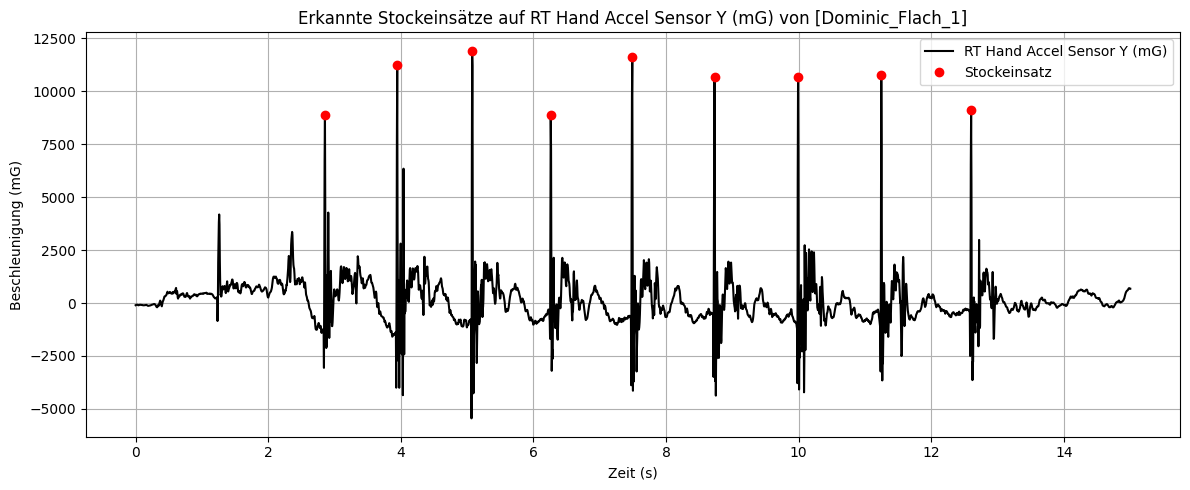

In [940]:
def plot_peaks_on_axis(df, axis_col, height=10000, distance=20, min_time_diff=0.5, title_suffix="", save_dir=None):
    # Peaks erkennen
    peaks, _ = find_peaks(df[axis_col], height=height, distance=distance)
    peak_times = df["time"].iloc[peaks].values

    # Peaks filtern: nur behalten, wenn Abstand zum vorherigen >= min_time_diff
    filtered_peaks = []
    last_time = -np.inf
    for idx, t in zip(peaks, peak_times):
        if t - last_time >= min_time_diff:
            filtered_peaks.append(idx)
            last_time = t
    filtered_peaks = np.array(filtered_peaks)

    # Neue Spalte im DataFrame: True bei Peak, sonst False
    df["is_peak"] = False
    df.loc[df.index[filtered_peaks], "is_peak"] = True

    # Aktivitätsnamen für den Titel holen (nur falls "Aufzeichnung" existiert)
    if "Aufzeichnung" in df.columns:
        activity = df["Aufzeichnung"].iloc[0]
        title = f"Erkannte Stockeinsätze auf {axis_col} von [{activity}]{title_suffix}"
    else:
        activity = "Unbekannt"
        title = f"Erkannte Stockeinsätze auf {axis_col}{title_suffix}"

    # Plot mit Markierungen
    plt.figure(figsize=(12, 5))
    plt.plot(df["time"], df[axis_col], label=axis_col, color="black")
    plt.plot(df["time"].iloc[filtered_peaks], df[axis_col].iloc[filtered_peaks], "ro", label="Stockeinsatz")
    plt.title(title)
    plt.xlabel("Zeit (s)")
    plt.ylabel("Beschleunigung (mG)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Plot speichern, falls gewünscht
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)
        # Dateinamen generieren
        safe_axis_col = axis_col.replace(" ", "_").replace("(", "").replace(")", "")
        safe_activity = str(activity).replace(" ", "_")
        filename = f"Peaks_{safe_activity}_{safe_axis_col}.png"
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot gespeichert unter: {save_path}")

    plt.show() # Plot schließen, damit im Notebook nichts angezeigt wird
    return filtered_peaks

#ordnerpfad = r"c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Validierung_Stockeinsatz_Zeitpunkte"

peaks = plot_peaks_on_axis(testdf, "RT Hand Accel Sensor Y (mG)", height=7000, distance=20, min_time_diff=0.5)



## Analyse der erkannten Stockeinsätze

Mit der Funktion `analyze_peaks()` werden die Zeitpunkte der erkannten **Stockeinsätze** (also die Peaks) ausgewertet.

Es wurden folgende Werte der Bewegung berechnet:

* **Zeitabstände** zwischen den einzelnen Einschlägen (`Δt`)
* **Mittelwert und Standardabweichung** dieser Zeitabstände
* **Schübe pro Minute** – also wie häufig ein Doppelstockschub stattfindet



In [941]:
def analyze_peaks(df):
    # Indizes der Peaks aus der Spalte 'is_peak'
    peaks = df.index[df["is_peak"] == True].to_numpy()
    peak_times = df.loc[peaks, "time"].values.round(2)  

    # Zeitabstände zwischen den Einschlägen berechnen
    time_differences = np.diff(peak_times)
    delta_t = np.append(time_differences, np.nan)  # Letzter Wert NaN

    # Aktivitätsnamen holen, falls vorhanden
    if "Aufzeichnung" in df.columns:
        activity = df["Aufzeichnung"].iloc[0]
    else:
        activity = None

    # Tabelle erstellen, alle Spalten direkt
    impact_df = pd.DataFrame({
        "Schub-Nr.": np.arange(1, len(peaks) + 1),
        "Index": peaks,
        "Zeit (s)": peak_times,
        "Aufzeichnung": activity,
        "Δt zum nächsten Einschlag (s)": delta_t
    })

    # Statistik berechnen
    mean_dt = np.mean(time_differences)
    std_dt = np.std(time_differences)

    # Schübe pro Minute berechnen
    if len(peaks) > 1:
        total_time = peak_times[-1] - peak_times[0]
        shoves_per_minute = len(peaks) / (total_time / 60) if total_time > 0 else np.nan
    else:
        shoves_per_minute = np.nan

    return impact_df, mean_dt, std_dt, shoves_per_minute


impact_df, mean_dt, std_dt, shoves_per_minute = analyze_peaks(testdf)
#print(impact_df)

# Ausgabe der Berechnungen
print(f"Mittelwert der Zeitabstände: {mean_dt:.3f} Sekunden")
print(f"Standardabweichung der Zeitabstände: {std_dt:.3f} Sekunden")
print(f"Schübe pro Minute: {shoves_per_minute:.2f}")

Mittelwert der Zeitabstände: 1.218 Sekunden
Standardabweichung der Zeitabstände: 0.079 Sekunden
Schübe pro Minute: 55.44



## Gelenkwinkel über die Zeit mit markierten Stockeinsätzen

Hier werden die **Gelenkwinkel** für Hüfte, Knie, Sprunggelenk und Ellbogen über die Zeit geplottet. Die roten Linien markieren jeweils die erkannten **Stockeinsätze**.

Das Ganze dient vor allem dazu, schnell einen Überblick zu bekommen, wie sich die Winkel während der Bewegung verändern – und ob alles plausibel aussieht.
Sollten irgendwo **auffällige Werte** oder **Messfehler** in den Daten sein (z. B. Ausreißer, Sensorprobleme), würde man das hier ziemlich gut sehen.


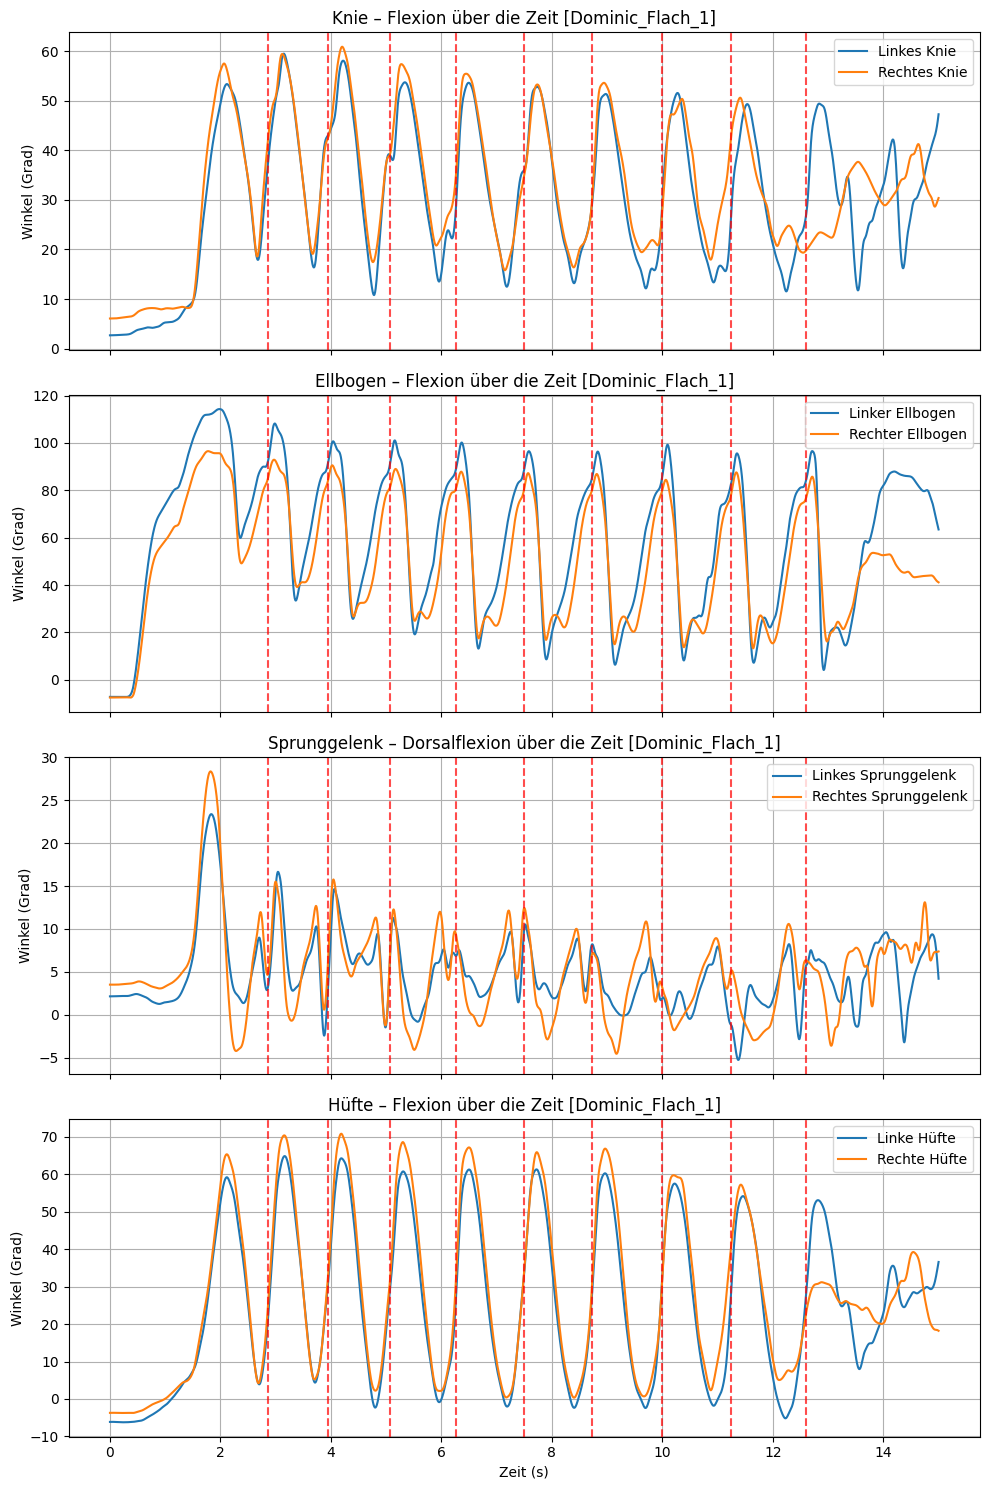

In [942]:
def plot_joint_angles_with_peaks(df, title_suffix=""):
    # Aktivitätsnamen für den Titel holen (nur falls "Aufzeichnung" existiert)
    if "Aufzeichnung" in df.columns:
        activity = df["Aufzeichnung"].iloc[0]
        title_knie = f"Knie – Flexion über die Zeit [{activity}]{title_suffix}"
        title_ellbogen = f"Ellbogen – Flexion über die Zeit [{activity}]{title_suffix}"
        title_sprunggelenk = f"Sprunggelenk – Dorsalflexion über die Zeit [{activity}]{title_suffix}"
        title_huefte = f"Hüfte – Flexion über die Zeit [{activity}]{title_suffix}"
    else:
        title_knie = f"Knie – Flexion über die Zeit{title_suffix}"
        title_ellbogen = f"Ellbogen – Flexion über die Zeit{title_suffix}"
        title_sprunggelenk = f"Sprunggelenk – Dorsalflexion über die Zeit{title_suffix}"
        title_huefte = f"Hüfte – Flexion über die Zeit{title_suffix}"

    peaks = df.index[df["is_peak"] == True].to_numpy()
    peak_times = df.loc[peaks, "time"].values

    winkel_spalten = [
        'LT Hip Flexion (Grad)', 'RT Hip Flexion (Grad)',
        'LT Knee Flexion (Grad)', 'RT Knee Flexion (Grad)',
        'LT Elbow Flexion (Grad)', 'RT Elbow Flexion (Grad)',
        'LT Ankle Dorsiflexion (Grad)', 'RT Ankle Dorsiflexion (Grad)',
    ]
    winkel_df = df[winkel_spalten]

    fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

    # Knie
    axes[0].plot(df["time"], winkel_df['LT Knee Flexion (Grad)'], label='Linkes Knie')
    axes[0].plot(df["time"], winkel_df['RT Knee Flexion (Grad)'], label='Rechtes Knie')
    axes[0].set_title(title_knie)
    axes[0].set_ylabel('Winkel (Grad)')
    axes[0].legend()
    axes[0].grid()
    for peak_time in peak_times:
        axes[0].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    # Ellbogen
    axes[1].plot(df["time"], winkel_df['LT Elbow Flexion (Grad)'], label='Linker Ellbogen')
    axes[1].plot(df["time"], winkel_df['RT Elbow Flexion (Grad)'], label='Rechter Ellbogen')
    axes[1].set_title(title_ellbogen)
    axes[1].set_ylabel('Winkel (Grad)')
    axes[1].legend()
    axes[1].grid()
    for peak_time in peak_times:
        axes[1].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    # Sprunggelenk
    axes[2].plot(df["time"], winkel_df['LT Ankle Dorsiflexion (Grad)'], label='Linkes Sprunggelenk')
    axes[2].plot(df["time"], winkel_df['RT Ankle Dorsiflexion (Grad)'], label='Rechtes Sprunggelenk')
    axes[2].set_title(title_sprunggelenk)
    axes[2].set_ylabel('Winkel (Grad)')
    axes[2].legend()
    axes[2].grid()
    for peak_time in peak_times:
        axes[2].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    # Hüfte
    axes[3].plot(df["time"], winkel_df['LT Hip Flexion (Grad)'], label='Linke Hüfte')
    axes[3].plot(df["time"], winkel_df['RT Hip Flexion (Grad)'], label='Rechte Hüfte')
    axes[3].set_title(title_huefte)
    axes[3].set_xlabel('Zeit (s)')
    axes[3].set_ylabel('Winkel (Grad)')
    axes[3].legend()
    axes[3].grid()
    for peak_time in peak_times:
        axes[3].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_joint_angles_with_peaks(testdf)


## ROM-Berechnung pro Doppelstock-Zyklus

Hier wird für **jeden Zyklus** (also von Stockeinsatz zu Stockeinsatz) das **Minimum, Maximum und die Range of Motion (ROM)** der wichtigsten Gelenke berechnet – für Knie, Hüfte, Ellbogen und Sprunggelenk, jeweils links und rechts.

So bekommt man einen guten Überblick darüber, wie stark die Gelenke während der Bewegung im Einsatz waren – und kann später z. B. vergleichen, wie sich die Bewegung im Verlauf verändert oder ob links/rechts Unterschiede bestehen.


In [943]:
def berechne_max_min_rom(df):
    """
    Berechnet für jedes Intervall zwischen den Peaks die Min/Max/ROM-Werte für Knie, Hüfte, Ellbogen und Sprunggelenk.
    Erwartet Spaltennamen mit (Grad).
    """

    peaks = df.index[df["is_peak"] == True].to_numpy()
    peak_times = df.loc[peaks, "time"].values  # <-- .loc statt .iloc


    max_min_angles_rom = []
    for i in range(len(peaks)-1):
        start_idx = peaks[i]
        end_idx = peaks[i+1]
        interval_df = df.iloc[start_idx:end_idx]

        # Max und Min Werte für Knie, Hüfte, Ellbogen, Sprunggelenk (mit (Grad))
        knee_left_min = interval_df["LT Knee Flexion (Grad)"].min().round(1)
        knee_left_max = interval_df["LT Knee Flexion (Grad)"].max().round(1)
        knee_right_min = interval_df["RT Knee Flexion (Grad)"].min().round(1)
        knee_right_max = interval_df["RT Knee Flexion (Grad)"].max().round(1)

        hip_left_min = interval_df["LT Hip Flexion (Grad)"].min().round(1)
        hip_left_max = interval_df["LT Hip Flexion (Grad)"].max().round(1)
        hip_right_min = interval_df["RT Hip Flexion (Grad)"].min().round(1)
        hip_right_max = interval_df["RT Hip Flexion (Grad)"].max().round(1)

        elbow_left_min = interval_df["LT Elbow Flexion (Grad)"].min().round(1)
        elbow_left_max = interval_df["LT Elbow Flexion (Grad)"].max().round(1)
        elbow_right_min = interval_df["RT Elbow Flexion (Grad)"].min().round(1)
        elbow_right_max = interval_df["RT Elbow Flexion (Grad)"].max().round(1)

        ankle_left_min = interval_df["LT Ankle Dorsiflexion (Grad)"].min().round(1)
        ankle_left_max = interval_df["LT Ankle Dorsiflexion (Grad)"].max().round(1)
        ankle_right_min = interval_df["RT Ankle Dorsiflexion (Grad)"].min().round(1)
        ankle_right_max = interval_df["RT Ankle Dorsiflexion (Grad)"].max().round(1)

        # ROM für jedes Gelenk
        knee_left_rom = knee_left_max - knee_left_min
        knee_right_rom = knee_right_max - knee_right_min
        hip_left_rom = hip_left_max - hip_left_min
        hip_right_rom = hip_right_max - hip_right_min
        elbow_left_rom = elbow_left_max - elbow_left_min
        elbow_right_rom = elbow_right_max - elbow_right_min
        ankle_left_rom = ankle_left_max - ankle_left_min
        ankle_right_rom = ankle_right_max - ankle_right_min

        # Speichern der Ergebnisse in einer Liste

        max_min_angles_rom.append({
            "Knee Left Min": knee_left_min, "Knee Right Min": knee_right_min,
            "Knee Left Max": knee_left_max, "Knee Right Max": knee_right_max,
            "Knee Left ROM": knee_left_rom, "Knee Right ROM": knee_right_rom,

            "Hip Left Min": hip_left_min, "Hip Right Min": hip_right_min,
            "Hip Left Max": hip_left_max, "Hip Right Max": hip_right_max,
            "Hip Left ROM": hip_left_rom, "Hip Right ROM": hip_right_rom,

            "Elbow Left Min": elbow_left_min, "Elbow Right Min": elbow_right_min,
            "Elbow Left Max": elbow_left_max, "Elbow Right Max": elbow_right_max,
            "Elbow Left ROM": elbow_left_rom, "Elbow Right ROM": elbow_right_rom,

            "Ankle Left Min": ankle_left_min, "Ankle Right Min": ankle_right_min,
            "Ankle Left Max": ankle_left_max, "Ankle Right Max": ankle_right_max,
            "Ankle Left ROM": ankle_left_rom, "Ankle Right ROM": ankle_right_rom,
        })

    max_min_rom_df = pd.DataFrame(max_min_angles_rom)
    return max_min_rom_df

max_min_rom_df = berechne_max_min_rom(testdf)
max_min_rom_df_zeit = pd.concat([impact_df, max_min_rom_df], axis=1) # zusammenführen der beiden DataFrames

#auskommentieren um die Tabelle zu sehen
#print(max_min_rom_df)



## Durchschnittliche ROM pro Schub-Zyklus (links/rechts gemittelt)

Da wir in unserer Analyse später **nicht zwischen links und rechts unterscheiden**, wird hier für jeden Doppelstock-Zyklus der **durchschnittliche ROM** pro Gelenk berechnet – also jeweils der Mittelwert aus links und rechts.

So haben wir für jeden Schub eine kompakte Übersicht über die Bewegungsausmaße von **Knie, Hüfte, Ellbogen und Sprunggelenk**.


In [944]:
def berechne_avg_rom(df):
    """
    Berechnet für jedes Intervall zwischen den Peaks den Durchschnitts-ROM für Knie, Hüfte, Ellbogen und Sprunggelenk (links/rechts gemittelt).
    Gibt einen DataFrame mit den Mittelwerten pro Schub-Zyklus zurück.
    """
    peaks = df.index[df["is_peak"] == True].to_numpy()

    avg_rom_list = []
    for i in range(len(peaks)-1):
        start_idx = peaks[i]
        end_idx = peaks[i+1]
        interval_df = df.iloc[start_idx:end_idx]

        # ROM für jedes Gelenk (links/rechts)
        knee_left_rom = interval_df["LT Knee Flexion (Grad)"].max() - interval_df["LT Knee Flexion (Grad)"].min()
        knee_right_rom = interval_df["RT Knee Flexion (Grad)"].max() - interval_df["RT Knee Flexion (Grad)"].min()
        hip_left_rom = interval_df["LT Hip Flexion (Grad)"].max() - interval_df["LT Hip Flexion (Grad)"].min()
        hip_right_rom = interval_df["RT Hip Flexion (Grad)"].max() - interval_df["RT Hip Flexion (Grad)"].min()
        elbow_left_rom = interval_df["LT Elbow Flexion (Grad)"].max() - interval_df["LT Elbow Flexion (Grad)"].min()
        elbow_right_rom = interval_df["RT Elbow Flexion (Grad)"].max() - interval_df["RT Elbow Flexion (Grad)"].min()
        ankle_left_rom = interval_df["LT Ankle Dorsiflexion (Grad)"].max() - interval_df["LT Ankle Dorsiflexion (Grad)"].min()
        ankle_right_rom = interval_df["RT Ankle Dorsiflexion (Grad)"].max() - interval_df["RT Ankle Dorsiflexion (Grad)"].min()

        # Mittelwert links/rechts
        knee_avg_rom = np.mean([knee_left_rom, knee_right_rom])
        hip_avg_rom = np.mean([hip_left_rom, hip_right_rom])
        elbow_avg_rom = np.mean([elbow_left_rom, elbow_right_rom])
        ankle_avg_rom = np.mean([ankle_left_rom, ankle_right_rom])

        avg_rom_list.append({
            "Knee Avg ROM": round(knee_avg_rom, 2),
            "Hip Avg ROM": round(hip_avg_rom, 2),
            "Elbow Avg ROM": round(elbow_avg_rom, 2),
            "Ankle Avg ROM": round(ankle_avg_rom, 2),
        })

    avg_rom_df = pd.DataFrame(avg_rom_list)
    return avg_rom_df

# Beispiel-Aufruf:
avg_rom_df = berechne_avg_rom(testdf)
avg_rom_df_zeit = pd.concat([impact_df, avg_rom_df], axis=1)  # zusammenführen der beiden DataFrames
print(avg_rom_df_zeit)

   Schub-Nr.  Index  Zeit (s)     Aufzeichnung  Δt zum nächsten Einschlag (s)  \
0          1    836      2.86  Dominic_Flach_1                           1.08   
1          2   1054      3.94  Dominic_Flach_1                           1.14   
2          3   1280      5.08  Dominic_Flach_1                           1.18   
3          4   1517      6.26  Dominic_Flach_1                           1.23   
4          5   1763      7.49  Dominic_Flach_1                           1.24   
5          6   2011      8.73  Dominic_Flach_1                           1.26   
6          7   2263      9.99  Dominic_Flach_1                           1.25   
7          8   2514     11.24  Dominic_Flach_1                           1.36   
8          9   2785     12.60  Dominic_Flach_1                            NaN   

   Knee Avg ROM  Hip Avg ROM  Elbow Avg ROM  Ankle Avg ROM  
0         45.36        67.59          68.84          13.14  
1         38.39        64.04          71.97          12.26  
2     


## Speichern der Auswertung als CSV-Datei

Am Ende wird der zusammengeführte DataFrame mit den **durchschnittlichen ROM-Werten pro Schub** und den zugehörigen **Zeitinfos** (Schubfrequenz, Mittelwert/Standardabweichung der Zeitabstände) als **CSV-Datei gespeichert**.

So haben wir für jede Aufzeichnung eine eigene Datei mit allen relevanten Werten, die später für die Analyse oder Visualisierung weiterverwendet werden kann.


In [945]:
def save_avg_rom_df(df, mean_dt, std_dt, shoves_per_minute):
    import os
    import pandas as pd
    import re

    if df.empty:
        print("Warnung: Der übergebene DataFrame ist leer.")
        return

    if "Aufzeichnung" not in df.columns:
        print("Fehler: Spalte 'Aufzeichnung' fehlt im DataFrame.")
        return

    # Aktivitätsname bereinigen
    activity = re.sub(r'[\\/*?:"<>|]', "_", str(df["Aufzeichnung"].iloc[0]))

    basis_ordner = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock'
    zielordner = os.path.join(basis_ordner, "Data_nach_Auswertung")
    os.makedirs(zielordner, exist_ok=True)

    dateiname = f"{activity}_avg_rom.csv"
    pfad = os.path.join(zielordner, dateiname)

    # Öffne die Datei im Schreibmodus und schreibe die Zusatzinfos
    with open(pfad, "w", encoding="utf-8") as f:
        f.write(f"# mean_dt: {mean_dt}\n")
        f.write(f"# std_dt: {std_dt}\n")
        f.write(f"# shoves_per_minute: {shoves_per_minute}\n")
        f.write("#\n")  # Leere Zeile zur Trennung
        df.to_csv(f, sep=";", index=False)

    print(f"DataFrame mit Metadaten gespeichert unter: {pfad}")
    return pfad

# Beispiel-Aufruf:
#save_avg_rom_df(avg_rom_df_zeit, mean_dt, std_dt, shoves_per_minute)


## Zeitabstände zwischen den Stockeinsätzen

Zum Schluss wird hier noch der Verlauf der **Zeitabstände (Δt)** zwischen den einzelnen Stockeinsätzen über die Aufzeichnung hinweg geplottet.

So lässt sich gut erkennen, ob der **Rhythmus der Bewegung konstant** geblieben ist oder ob es z. B. zu **Verlangsamungen oder Schwankungen** im Bewegungsablauf kam – was z. B. auf Ermüdung oder technische Unsauberkeit hinweisen könnte.


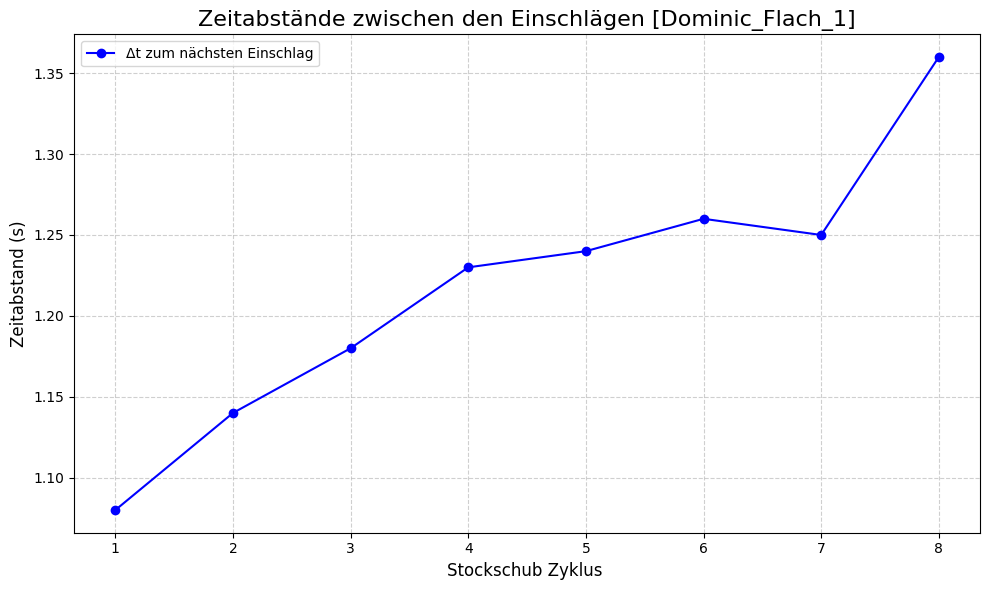

In [946]:
def plot_delta_t_impact(df, title="Zeitabstände zwischen den Einschlägen", ylabel="Zeitabstand (s)"):
    """
    Plottet die Zeitabstände (Δt) zwischen den Einschlägen über den DataFrame-Index.
    Erwartet eine Spalte 'Δt zum nächsten Einschlag (s)' im DataFrame.
    """
    # Aktivitätsnamen für den Titel holen (nur falls "Aufzeichnung" existiert)
    if "Aufzeichnung" in df.columns:
        activity = df["Aufzeichnung"].iloc[0]
        title = f"{title} [{activity}]"
    plt.figure(figsize=(10, 6))
    plt.plot(df["Schub-Nr."], df["Δt zum nächsten Einschlag (s)"], label="Δt zum nächsten Einschlag", color="blue", marker="o")
    plt.title(title, fontsize=16)
    plt.xlabel("Stockschub Zyklus ", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_delta_t_impact(max_min_rom_df_zeit)


## Optionaler Rechts-Links-Vergleich

In den folgenden Plots haben wir für jede Aufzeichnung noch einen **kurzen Vergleich zwischen linker und rechter Körperseite** gemacht – z. B. für ROM-Werte einzelner Gelenke.

Das war **nicht Teil unserer eigentlichen Forschungsfrage**, deshalb wurde dieser Aspekt in der späteren Analyse **nicht weiterverfolgt**.
Wir wollten es aber trotzdem drinlassen, um zu zeigen, **welche weiteren Auswertungen möglich wären** und wo eventuell noch interessante Unterschiede stecken könnten.


#### Übersichtliche Statistik pro Gelenk (links/rechts getrennt)

Bevor wir die Daten für den Rechts-Links-Vergleich geplottet haben, wurde hier für jede relevante Spalte der **Mittelwert** und die **Standardabweichung** berechnet.

Das gibt einen schnellen Überblick, wie sich die Werte im Schnitt verhalten und ob es z. B. größere **Unterschiede zwischen linker und rechter Seite** gibt – rein deskriptiv, ohne tiefergehende Analyse.


In [947]:
def berechne_statistik_rom(df):
    """
    Berechnet Mittelwert und Standardabweichung für alle numerischen Spalten ab der dritten Spalte eines DataFrames.
    Gibt ein DataFrame mit Spaltenname, Mittelwert und Standardabweichung zurück.
    """
    numerische_spalten = df.columns[4:]  # Spalten ab der dritten Spalte
    durchschnittswerte = df[numerische_spalten].mean().round(2)
    standardabweichungen = df[numerische_spalten].std().round(2)

    statistik_df = pd.DataFrame({
        "Spalte": numerische_spalten,
        "Mittelwert": durchschnittswerte.values,
        "Standardabweichung": standardabweichungen.values
    })
    return statistik_df

# Beispiel-Aufruf:
statistik_df = berechne_statistik_rom(max_min_rom_df_zeit)
print(statistik_df)

                           Spalte  Mittelwert  Standardabweichung
0   Δt zum nächsten Einschlag (s)        1.22                0.08
1                   Knee Left Min       12.34                0.98
2                  Knee Right Min       18.30                1.71
3                   Knee Left Max       52.49                2.83
4                  Knee Right Max       52.41                6.89
5                   Knee Left ROM       40.15                3.13
6                  Knee Right ROM       34.11                7.49
7                    Hip Left Min       -1.12                3.89
8                   Hip Right Min        4.14                6.59
9                    Hip Left Max       59.10                3.85
10                  Hip Right Max       60.94               12.85
11                   Hip Left ROM       60.22                6.55
12                  Hip Right ROM       56.80               19.28
13                 Elbow Left Min       11.58                7.39
14        


## ROM-Verläufe links vs. rechts über die Schübe

In diesen Plots wird für jedes Gelenk der **ROM-Verlauf über alle Doppelstockzyklen** dargestellt – jeweils getrennt für **linke und rechte Seite**.

Das hilft, mögliche **Asymmetrien** oder **Auffälligkeiten** im Bewegungsablauf sichtbar zu machen. Wie schon erwähnt, war das **nicht Teil unserer Hauptanalyse**, aber wir haben es mal kurz ausprobiert


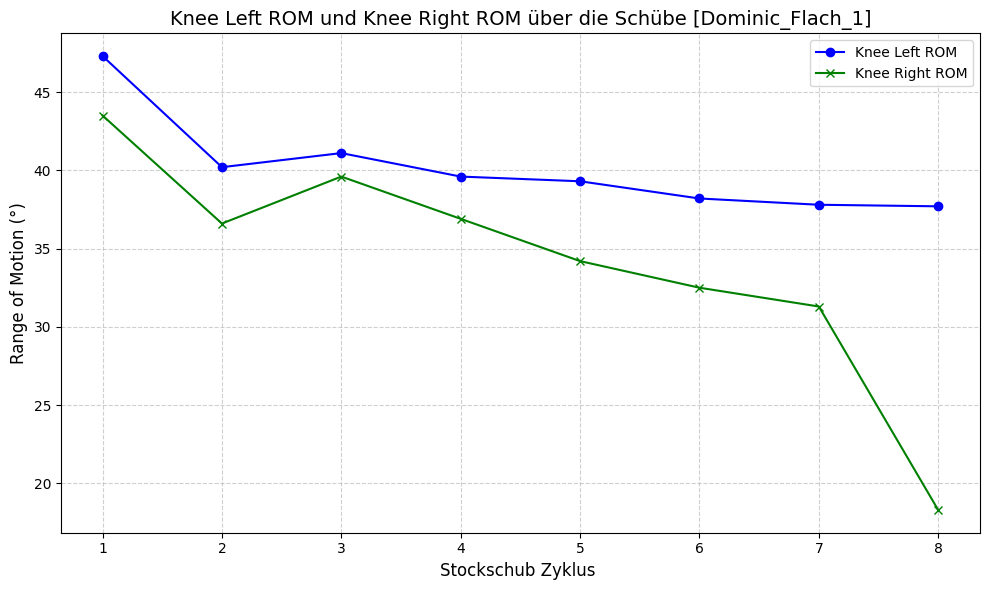

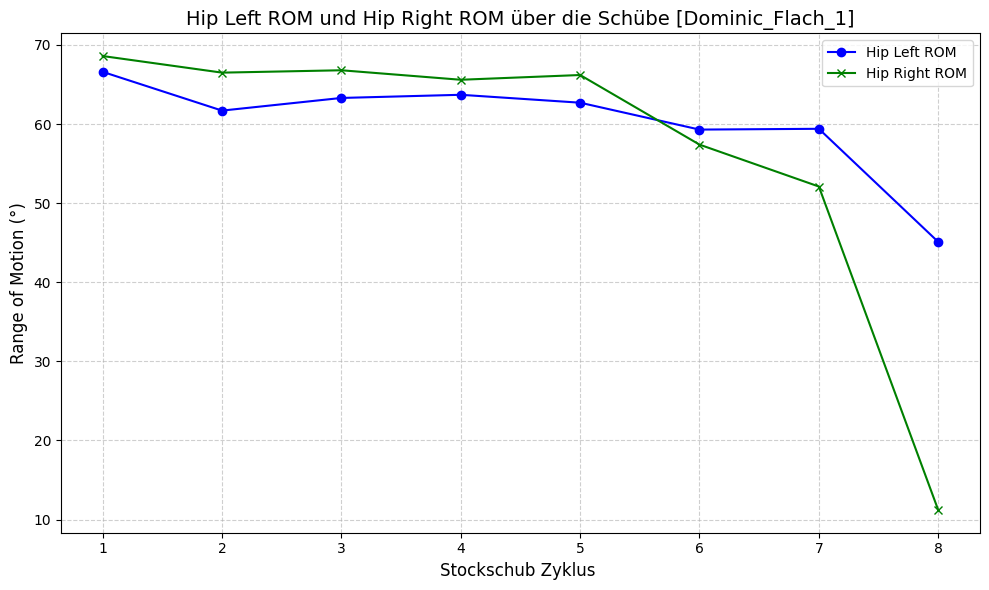

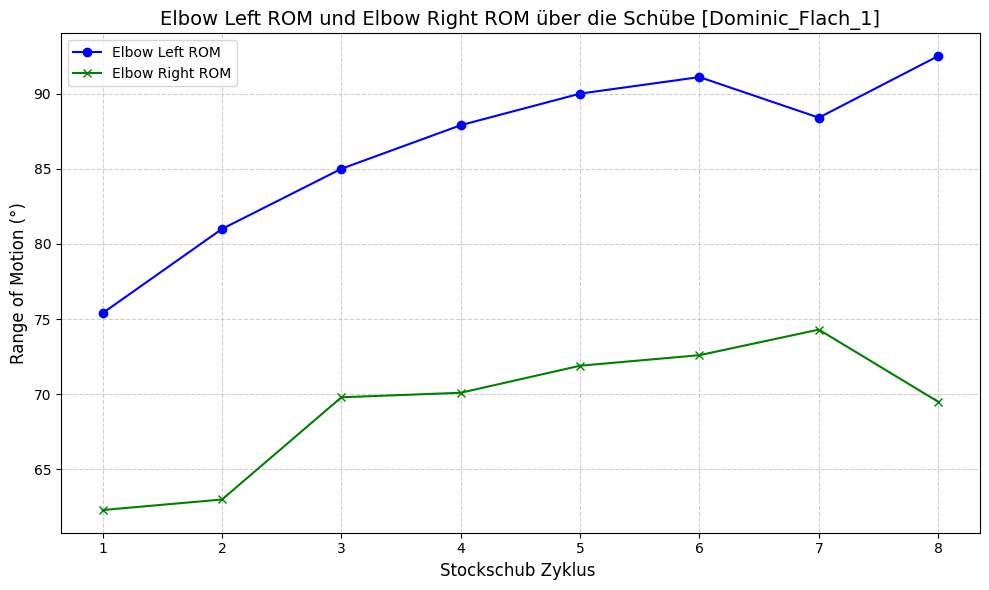

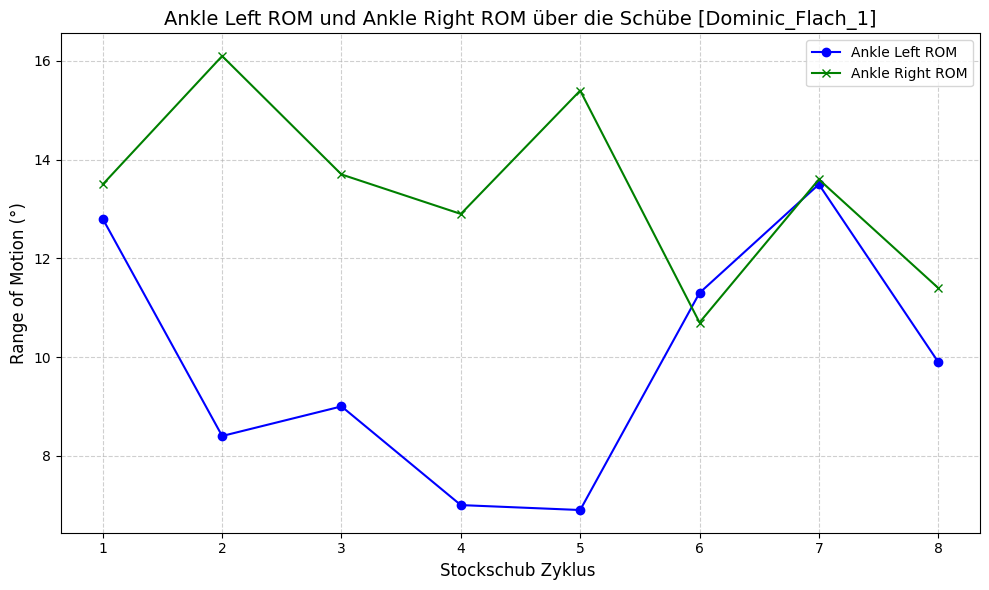

In [948]:
def plot_rom_verlauf(df, spalte_links, spalte_rechts, title="ROM-Verlauf", ylabel="Range of Motion (°)"):
    """
    Plottet den Verlauf von zwei ROM-Spalten (z.B. links/rechts) über die Schub-Nummer (beginnend bei 1).
    Der Titel wird automatisch um die Aktivität ergänzt, falls vorhanden.
    """
    # Aktivitätsnamen für den Titel holen (nur falls "Aufzeichnung" existiert)
    if "Aufzeichnung" in df.columns:
        activity = df["Aufzeichnung"].iloc[0]
        title = f"{title} [{activity}]"
    plt.figure(figsize=(10, 6))
    schuab_nummer = np.arange(1, len(df) + 1)  # Schub 1, 2, 3, ...
    plt.plot(schuab_nummer, df[spalte_links], label=spalte_links, color="blue", marker="o")
    plt.plot(schuab_nummer, df[spalte_rechts], label=spalte_rechts, color="green", marker="x")
    plt.title(title, fontsize=14)
    plt.xlabel("Stockschub Zyklus ", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_rom_verlauf(max_min_rom_df_zeit, "Knee Left ROM", "Knee Right ROM", title="Knee Left ROM und Knee Right ROM über die Schübe")
plot_rom_verlauf(max_min_rom_df_zeit, "Hip Left ROM", "Hip Right ROM", title="Hip Left ROM und Hip Right ROM über die Schübe")
plot_rom_verlauf(max_min_rom_df_zeit, "Elbow Left ROM", "Elbow Right ROM", title="Elbow Left ROM und Elbow Right ROM über die Schübe")
plot_rom_verlauf(max_min_rom_df_zeit, "Ankle Left ROM", "Ankle Right ROM", title="Ankle Left ROM und Ankle Right ROM über die Schübe")
